# **RNN: Red Neuronal Recurrente**

## **Librerías y modulos necesarios**

In [ ]:
# Modelado y Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from scikeras.wrappers import KerasClassifier

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Análisis y manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import pickle
import joblib


## **Conjunto de datos**

In [3]:
data = pd.read_csv('to_models.csv')
data.head()

,label,message,message_lists
0,Negativo,adha drama censor hojaye gaa khaas tor basant ...,"['adha', 'drama', 'censor', 'hojaye', 'gaa', '..."
1,Negativo,bekaar fuzool moti budhi laila jeet gayee lail...,"['bekaar', 'fuzool', 'moti', 'budhi', 'laila',..."
2,Negativo,choor kasuri choor jhootay moo kaala,"['choor', 'kasuri', 'choor', 'jhootay', 'moo',..."
3,Negativo,gali gali shor gaaanjaaaa shair chor,"['gali', 'gali', 'shor', 'gaaanjaaaa', 'shair'..."
4,Negativo,logic bhonkoon muted bhonk andaza laganay kosh...,"['logic', 'bhonkoon', 'muted', 'bhonk', 'andaz..."


In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10929 entries, 0 to 10997
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          10929 non-null  object
 1   message        10929 non-null  object
 2   message_lists  10929 non-null  object
dtypes: object(3)
memory usage: 341.5+ KB


## **Implementación del modelo**

In [7]:
texts = data['message'].astype(str)
labels = LabelEncoder().fit_transform(data['label'])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Convertir texto a secuencias y aplicar padding (temporalmente)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=100)  # long. inicial para el split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2,random_state=42)

In [8]:
def create_rnn_model(units, num_layers, dropout, learning_rate, sequence_length):
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=sequence_length))
    
    for i in range(num_layers):
        return_sequences = i < num_layers - 1
        model.add(SimpleRNN(units=units, return_sequences=return_sequences))
        model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = KerasClassifier(
    model=create_rnn_model,
    verbose=0,
    callbacks=[early_stop],
    validation_split=0.2  # <--- importante
)



In [10]:
param_grid_rnn = { 
    'model__units': [64,128],
    'model__num_layers': [1,2],
    'model__dropout': [0.2, 0.3],
    'model__learning_rate': [0.001,0.005],
    'model__sequence_length': [50, 100],
    'batch_size': [32, 64],
    'epochs': [1, 2]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid_rnn, cv=3, verbose=2)
grid_result = grid.fit(X_train, y_train)


Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] END batch_size=32, epochs=1, model__dropout=0.2, model__learning_rate=0.001, model__num_layers=1, model__sequence_length=50, model__units=64; total time=   0.5s
[CV] END batch_size=32, epochs=1, model__dropout=0.2, model__learning_rate=0.001, model__num_layers=1, model__sequence_length=50, model__units=64; total time=   0.1s
[CV] END batch_size=32, epochs=1, model__dropout=0.2, model__learning_rate=0.001, model__num_layers=1, model__sequence_length=50, model__units=64; total time=   0.1s
[CV] END batch_size=32, epochs=1, model__dropout=0.2, model__learning_rate=0.001, model__num_layers=1, model__sequence_length=50, model__units=128; total time=   0.1s
[CV] END batch_size=32, epochs=1, model__dropout=0.2, model__learning_rate=0.001, model__num_layers=1, model__sequence_length=50, model__units=128; total time=   0.1s
[CV] END batch_size=32, epochs=1, model__dropout=0.2, model__learning_rate=0.001, model__num_layers=1, mo

c:\Users\kamac\miniconda3\envs\data_viz_clean\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
192 fits failed out of a total of 384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kamac\miniconda3\envs\data_viz_clean\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kamac\miniconda3\envs\data_viz_clean\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\kamac\miniconda3\envs\data_viz_clean\lib\site-packages\scikeras\wrappers

## **Resultados**

Accuracy: 0.7451967063129002
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76      1073
           1       0.81      0.66      0.72      1113

    accuracy                           0.75      2186
   macro avg       0.75      0.75      0.74      2186
weighted avg       0.76      0.75      0.74      2186

Confusion Matrix:
 [[899 174]
 [383 730]]


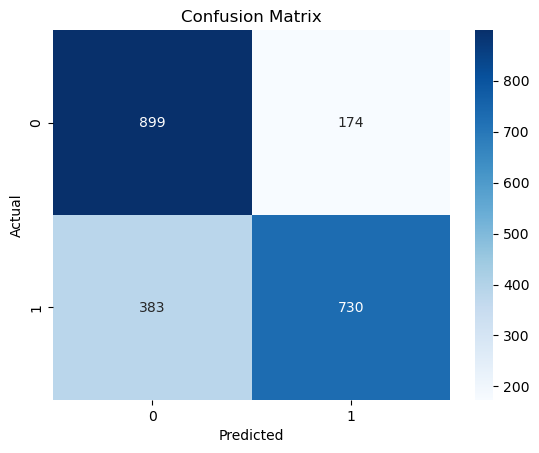

In [11]:
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualización de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Guarda el mejor modelo entrenado
joblib.dump(best_model, 'mejor_modelo_rnn.pkl')
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

## **Interpretación**

El modelo RNN entrenado para clasificar sentimientos en mensajes en urdu-romano alcanza una precisión general del 74.5%, mostrando un desempeño aceptable. Es más eficaz identificando mensajes negativos (recall de 84%) que positivos (recall de 66%), lo cual indica una tendencia a no reconocer correctamente una parte importante de los textos positivos. La matriz de confusión revela un número considerable de falsos negativos (mensajes positivos clasificados como negativos), lo que puede impactar negativamente si el objetivo es capturar expresiones positivas de manera precisa. En general, el modelo funciona bien.
